In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline
import altair as alt
from vega_datasets import data

In [2]:
#states = alt.topo_feature(data.us_10m.url, feature='states')
states = alt.topo_feature(data.us_10m.url, 'states')

In [3]:
df=pd.read_csv('C:\..\\us_state_obesity_data.csv',header=0)

In [4]:
df.head(5)

,Year,abbr,GeoLocation,AGEYR1824,AGEYR2534,AGEYR3544,AGEYR4554,AGEYR5564,AGEYR65PLUS,EDUCOGRAD,...,MALE,OVERALL,RACE2PLUS,RACEASN,RACEBLK,RACEHIS,RACEHPI,RACENAA,RACEOTH,RACEWHT
0,2011,AK,"(64.845079957001, -147.722059036)",19.8,23.5,29.5,29.2,33.4,29.3,22.1,...,28.0,27.4,23.3,0.0,0.0,31.5,0.0,30.9,35.5,25.9
1,2011,AL,"(32.840571122, -86.631860762)",16.3,35.2,35.5,38.0,36.4,27.1,26.4,...,32.3,32.0,27.8,0.0,40.1,28.6,0.0,32.9,0.0,29.8
2,2011,AR,"(34.748650124, -92.274490743)",23.0,29.3,32.9,36.4,36.9,26.1,26.4,...,30.7,30.9,26.4,0.0,38.1,18.4,0.0,19.3,0.0,31.0
3,2011,AZ,"(34.86597028, -111.763811277)",18.7,23.6,25.4,29.6,29.9,22.6,17.4,...,24.4,25.1,20.8,13.0,26.8,33.8,0.0,34.2,0.0,21.2
4,2011,CA,"(37.638640123, -120.999999538)",14.5,23.7,25.9,27.6,27.6,21.2,15.3,...,23.1,23.8,26.9,8.1,33.1,30.3,23.2,37.3,0.0,22.0


In [5]:
df.shape

(535, 31)

In [6]:
df.columns

Index(['Year', 'abbr', 'GeoLocation', 'AGEYR1824', 'AGEYR2534', 'AGEYR3544',
       'AGEYR4554', 'AGEYR5564', 'AGEYR65PLUS', 'EDUCOGRAD', 'EDUCOTEC',
       'EDUHS', 'EDUHSGRAD', 'FEMALE', 'INC1525', 'INC2535', 'INC3550',
       'INC5075', 'INC75PLUS', 'INCLESS15', 'INCNR', 'MALE', 'OVERALL',
       'RACE2PLUS', 'RACEASN', 'RACEBLK', 'RACEHIS', 'RACEHPI', 'RACENAA',
       'RACEOTH', 'RACEWHT'],
      dtype='object')

In [7]:
source = df[(df["OVERALL"] > 45)]

In [8]:
source.head()

,Year,abbr,GeoLocation,AGEYR1824,AGEYR2534,AGEYR3544,AGEYR4554,AGEYR5564,AGEYR65PLUS,EDUCOGRAD,...,MALE,OVERALL,RACE2PLUS,RACEASN,RACEBLK,RACEHIS,RACEHPI,RACENAA,RACEOTH,RACEWHT


In [11]:
source = df 

slider = alt.binding_range(min=2011, max=2020, step=1)
select_year = alt.selection_single(name="Year", fields=['Year'],
                                   bind=slider, init={'Year': 2020})

alt.Chart(source).mark_bar().encode(
    x=alt.X('abbr', title='State'),
    y=alt.Y('OVERALL', title='Obesity %'),
    tooltip='OVERALL'
).properties(
    width=400,
    title='Top 10 States with Adult Obesity'
).add_selection(
    select_year
).transform_filter(
    select_year
).configure_facet(
    spacing=8
).transform_window(
    rank='rank(OVERALL)',
    sort=[alt.SortField('OVERALL', order='descending')]
).transform_filter(
    (alt.datum.rank < 10)
)


alt.Chart(...)

In [9]:
df_us=df[df['abbr']=='US']

<b>3. Distributions and relationship.</b>
a) target variable distribution

In [10]:
#alt.Chart(df_us).mark_bar().encode(x="Year",y="OVERALL")

alt.Chart(df_us).mark_bar(size=10).encode(
    x=alt.X('Year:Q', title='Year'),
    y=alt.Y('OVERALL:Q', title='Obesity %'),
    tooltip='OVERALL'
).properties(
    width=400,
    title='US Obesity Trend'
).configure_facet(
    spacing=8
)


alt.Chart(...)

In [11]:
df2=df[(df['abbr']!='US') & (df['Year']==2020)]

In [12]:
df_us_male=df_us[['Year','MALE']].groupby("Year").mean()

In [13]:
from pylab import rcParams

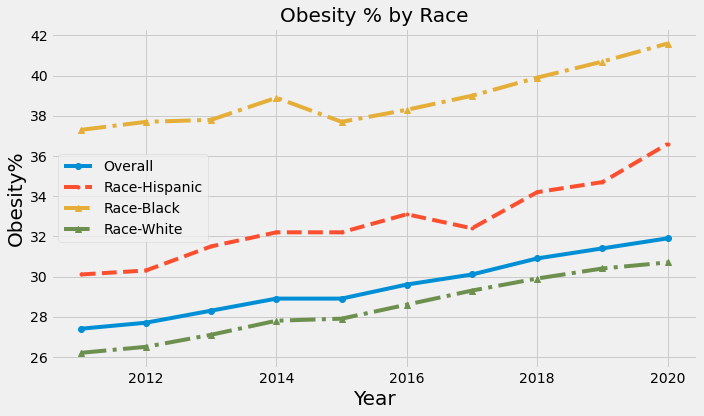

In [31]:
rcParams['figure.figsize'] = 10, 6
overall = df_us[['Year','OVERALL']].groupby("Year").mean()
hispanic=df_us[['Year','RACEHIS']].groupby("Year").mean()
black=df_us[['Year','RACEBLK']].groupby("Year").mean()
white=df_us[['Year','RACEWHT']].groupby("Year").mean()
plt.plot(overall,linestyle='solid',marker='o',label="Overall")
plt.plot(hispanic,linestyle='dashed',marker='.',label="Race-Hispanic")
plt.plot(black,linestyle='dashdot',marker='^',label="Race-Black")
plt.plot(white,linestyle='dashdot',marker='^',label="Race-White")
plt.xlabel('Year', fontsize=20)
plt.ylabel('Obesity%', fontsize=20)
plt.title('Obesity % by Race', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()

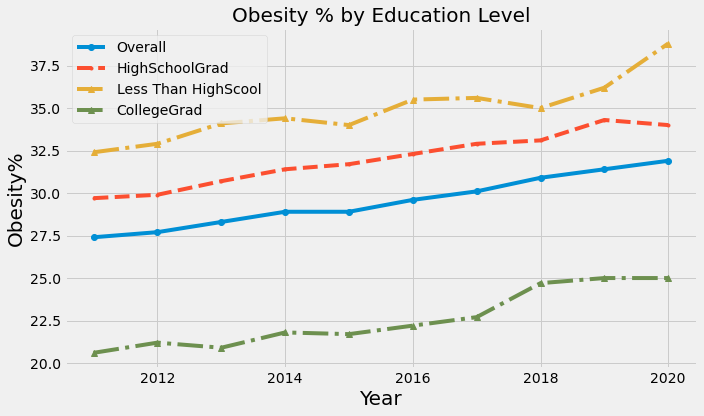

In [32]:
rcParams['figure.figsize'] = 10, 6
overall = df_us[['Year','OVERALL']].groupby("Year").mean()
hsgrad=df_us[['Year','EDUHSGRAD']].groupby("Year").mean()
high=df_us[['Year','EDUHS']].groupby("Year").mean()
college=df_us[['Year','EDUCOGRAD']].groupby("Year").mean()
plt.plot(overall,linestyle='solid',marker='o',label="Overall")
plt.plot(hsgrad,linestyle='dashed',marker='.',label="HighSchoolGrad")
plt.plot(high,linestyle='dashdot',marker='^',label="Less Than HighScool")
plt.plot(college,linestyle='dashdot',marker='^',label="CollegeGrad")
plt.xlabel('Year', fontsize=20)
plt.ylabel('Obesity%', fontsize=20)
plt.title('Obesity % by Education Level', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()

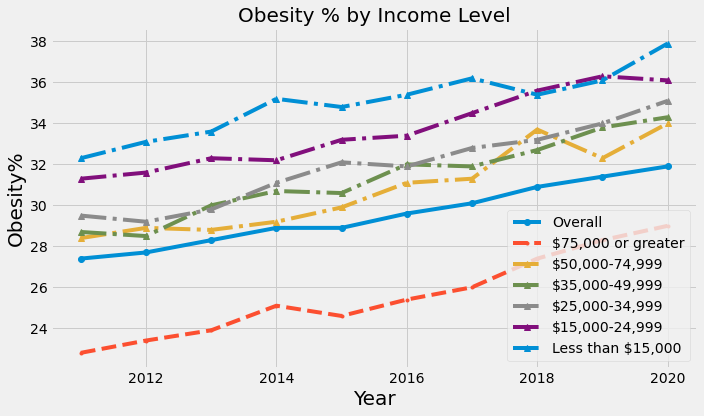

In [33]:
rcParams['figure.figsize'] = 10, 6
overall = df_us[['Year','OVERALL']].groupby("Year").mean()
INC75PLUS=df_us[['Year','INC75PLUS']].groupby("Year").mean()
INC5075=df_us[['Year','INC5075']].groupby("Year").mean()
INC3550=df_us[['Year','INC3550']].groupby("Year").mean()
INC2535=df_us[['Year','INC2535']].groupby("Year").mean()
INC1525=df_us[['Year','INC1525']].groupby("Year").mean()
INCLESS15=df_us[['Year','INCLESS15']].groupby("Year").mean()
plt.plot(overall,linestyle='solid',marker='o',label="Overall")
plt.plot(INC75PLUS,linestyle='dashed',marker='.',label="$75,000 or greater")
plt.plot(INC5075,linestyle='dashdot',marker='^',label="$50,000-74,999")
plt.plot(INC3550,linestyle='dashdot',marker='^',label="$35,000-49,999")
plt.plot(INC2535,linestyle='dashdot',marker='^',label="$25,000-34,999")
plt.plot(INC1525,linestyle='dashdot',marker='^',label="$15,000-24,999")
plt.plot(INCLESS15,linestyle='dashdot',marker='^',label="Less than $15,000")
plt.xlabel('Year', fontsize=20)
plt.ylabel('Obesity%', fontsize=20)
plt.title('Obesity % by Income Level', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()

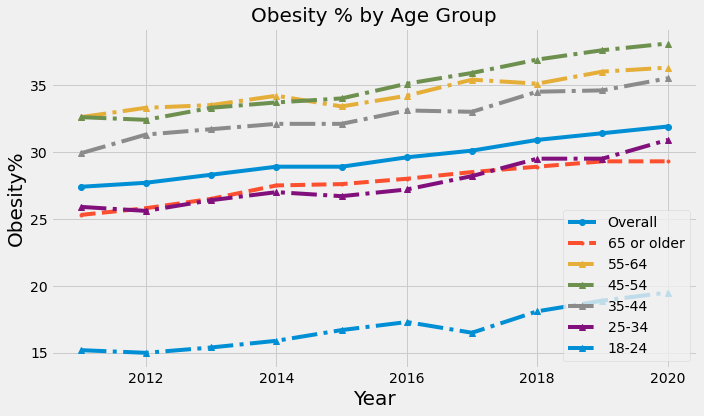

In [34]:
rcParams['figure.figsize'] = 10, 6
overall = df_us[['Year','OVERALL']].groupby("Year").mean()
AGEYR65PLUS=df_us[['Year','AGEYR65PLUS']].groupby("Year").mean()
AGEYR5564=df_us[['Year','AGEYR5564']].groupby("Year").mean()
AGEYR4554=df_us[['Year','AGEYR4554']].groupby("Year").mean()
AGEYR3544=df_us[['Year','AGEYR3544']].groupby("Year").mean()
AGEYR2534=df_us[['Year','AGEYR2534']].groupby("Year").mean()
AGEYR1824=df_us[['Year','AGEYR1824']].groupby("Year").mean()
plt.plot(overall,linestyle='solid',marker='o',label="Overall")
plt.plot(AGEYR65PLUS,linestyle='dashed',marker='.',label="65 or older")
plt.plot(AGEYR5564,linestyle='dashdot',marker='^',label="55-64")
plt.plot(AGEYR4554,linestyle='dashdot',marker='^',label="45-54")
plt.plot(AGEYR3544,linestyle='dashdot',marker='^',label="35-44")
plt.plot(AGEYR2534,linestyle='dashdot',marker='^',label="25-34")
plt.plot(AGEYR1824,linestyle='dashdot',marker='^',label="18-24")
plt.xlabel('Year', fontsize=20)
plt.ylabel('Obesity%', fontsize=20)
plt.title('Obesity % by Age Group', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [18]:
df2=df[(df['abbr']!='US') & (df['Year']==2020)]

In [19]:
#df2.head()
df3 = df2.drop('Year',1)

In [20]:
df3.head()

,abbr,GeoLocation,AGEYR1824,AGEYR2534,AGEYR3544,AGEYR4554,AGEYR5564,AGEYR65PLUS,EDUCOGRAD,EDUCOTEC,...,MALE,OVERALL,RACE2PLUS,RACEASN,RACEBLK,RACEHIS,RACEHPI,RACENAA,RACEOTH,RACEWHT
481,AK,"(64.84507995700051, -147.72205903599973)",21.0,31.4,32.4,38.2,33.7,32.7,24.1,35.6,...,33.8,31.9,29.7,29.6,0.0,33.4,0.0,36.0,0.0,29.1
482,AL,"(32.84057112200048, -86.63186076199969)",27.1,37.5,43.6,48.0,42.0,34.9,36.1,40.1,...,37.7,39.0,30.3,0.0,48.1,38.8,0.0,49.7,0.0,36.2
483,AR,"(34.74865012400045, -92.27449074299966)",27.1,34.1,44.7,42.0,41.5,30.5,31.5,40.3,...,33.8,36.4,38.2,0.0,45.9,34.2,0.0,24.7,0.0,35.7
484,AZ,"(34.865970280000454, -111.76381127699972)",20.5,32.4,36.5,37.1,33.8,25.8,24.5,33.0,...,30.8,30.9,37.6,14.6,36.5,37.4,0.0,44.0,34.0,26.9
485,CA,"(37.63864012300047, -120.99999953799971)",18.7,31.2,32.4,33.9,36.5,26.1,19.6,33.0,...,30.7,30.3,26.0,11.5,51.9,41.7,0.0,0.0,0.0,25.3


In [21]:
ansi = pd.read_csv('https://www2.census.gov/geo/docs/reference/state.txt', sep='|')
ansi.columns = ['id', 'abbr', 'state', 'statens']
ansi = ansi[['abbr', 'id', 'state']]

In [22]:
ansi.head()

,abbr,id,state
0,AL,1,Alabama
1,AK,2,Alaska
2,AZ,4,Arizona
3,AR,5,Arkansas
4,CA,6,California


In [23]:
ansi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   abbr    57 non-null     object
 1   id      57 non-null     int64 
 2   state   57 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [25]:
df4=pd.merge(ansi,df3, how="inner", on=["abbr"])

In [26]:
df4.head()

,abbr,id,state,GeoLocation,AGEYR1824,AGEYR2534,AGEYR3544,AGEYR4554,AGEYR5564,AGEYR65PLUS,...,MALE,OVERALL,RACE2PLUS,RACEASN,RACEBLK,RACEHIS,RACEHPI,RACENAA,RACEOTH,RACEWHT
0,AL,1,Alabama,"(32.84057112200048, -86.63186076199969)",27.1,37.5,43.6,48.0,42.0,34.9,...,37.7,39.0,30.3,0.0,48.1,38.8,0.0,49.7,0.0,36.2
1,AK,2,Alaska,"(64.84507995700051, -147.72205903599973)",21.0,31.4,32.4,38.2,33.7,32.7,...,33.8,31.9,29.7,29.6,0.0,33.4,0.0,36.0,0.0,29.1
2,AZ,4,Arizona,"(34.865970280000454, -111.76381127699972)",20.5,32.4,36.5,37.1,33.8,25.8,...,30.8,30.9,37.6,14.6,36.5,37.4,0.0,44.0,34.0,26.9
3,AR,5,Arkansas,"(34.74865012400045, -92.27449074299966)",27.1,34.1,44.7,42.0,41.5,30.5,...,33.8,36.4,38.2,0.0,45.9,34.2,0.0,24.7,0.0,35.7
4,CA,6,California,"(37.63864012300047, -120.99999953799971)",18.7,31.2,32.4,33.9,36.5,26.1,...,30.7,30.3,26.0,11.5,51.9,41.7,0.0,0.0,0.0,25.3


In [27]:
states = alt.topo_feature(data.us_10m.url, 'states')


In [28]:
variable_list = ['OVERALL', 'AGEYR1824', 'RACEBLK']
alt.Chart(states).mark_geoshape().encode(
    color='OVERALL:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df4, 'id', list(df4.columns))
).properties(
    width=500,
    height=300,
    title='US Adult Obesity % Map'
).project(
    type='albersUsa'
)

alt.Chart(...)